## 預測金融客戶是否流失

### 讀取資料

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', index_col = 0)
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


### 資料預處理

In [3]:
y = df['Exited']
del df['Exited']

In [4]:
del df['Surname']

In [5]:
del df['CustomerId']

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
geo = pandas.get_dummies(df['Geography'])
del geo['France']
geo.head()

,Germany,Spain
RowNumber,,
1,0,0
2,0,1
3,0,0
4,0,0
5,0,1


In [9]:
gender = pandas.get_dummies(df['Gender'])
del gender['Female']
gender.head()

,Male
RowNumber,
1,0
2,0
3,0
4,0
5,0


In [10]:
del df['Geography']
del df['Gender']
customer = pandas.concat([df, geo, gender], axis = 1 )
customer.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
X = customer.values

In [46]:
X.shape

(10000, 11)

In [47]:
y.shape

(10000,)

### 資料標準化 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [48]:
X

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

### 建構模型

In [49]:
from keras.layers import Dense, Activation
from keras.models   import Sequential

In [50]:
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(11,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [51]:

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy']
             )

In [53]:
import keras
tbCallBack   = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)
tbCheckpoint = keras.callbacks.ModelCheckpoint('model.h5', monitor='val_loss', verbose=0)

history = model.fit(X, y,
                    batch_size=100,
                    epochs=10,
                    verbose=1,
                    callbacks = [tbCallBack,tbCheckpoint])

Epoch 1/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4586 - acc: 0.8010
Epoch 2/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4557 - acc: 0.8019
Epoch 3/10
10000/10000 [==============================] - 0s 8us/step - loss: 0.4528 - acc: 0.8039
Epoch 4/10
10000/10000 [==============================] - 0s 9us/step - loss: 0.4501 - acc: 0.8041
Epoch 5/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4475 - acc: 0.8050
Epoch 6/10
10000/10000 [==============================] - 0s 6us/step - loss: 0.4450 - acc: 0.8056
Epoch 7/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4428 - acc: 0.8070
Epoch 8/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4407 - acc: 0.8085
Epoch 9/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4387 - acc: 0.8087
Epoch 10/10
10000/10000 [==============================] - 0s 7us/step - loss: 0.4369 - acc: 0.8097


### 使用模型做預測

In [33]:
predicted = model.predict(X)

In [37]:
predicted = (predicted > 0.5).flatten().astype(int)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, predicted)

0.864

In [40]:
confusion_matrix(y, predicted)

array([[7662,  301],
       [1059,  978]], dtype=int64)

## Incremental Learning
- https://scikit-learn.org/0.15/modules/scaling_strategies.html

## 比較優化器

### 讀取客戶流失數據

In [54]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/customer_churn.csv', index_col=0, header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 數據預處理

In [55]:
df = df.iloc[:,3:]

In [56]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [57]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

### 區分訓練與測試數據集

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42)

In [62]:
x_train.shape

(2233, 16)

In [63]:
x_test.shape

(1100, 16)

In [64]:
y_train.shape

(2233,)

In [65]:
y_test.shape

(1100,)

### 資料標準化 

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [71]:
def tarinProcess(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    history = classifier.fit(x_train, y_train,
                        batch_size=10,
                        epochs=100,
                        verbose=0,
                        validation_data=(x_test, y_test))
    return history

In [72]:
history1 = tarinProcess('sgd')

In [73]:
history2 = tarinProcess('RMSprop')

In [74]:
history3 = tarinProcess('Adagrad')

In [75]:
history4 = tarinProcess('Adadelta')

In [76]:
history5 = tarinProcess('Adam')

### 比較優化器

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


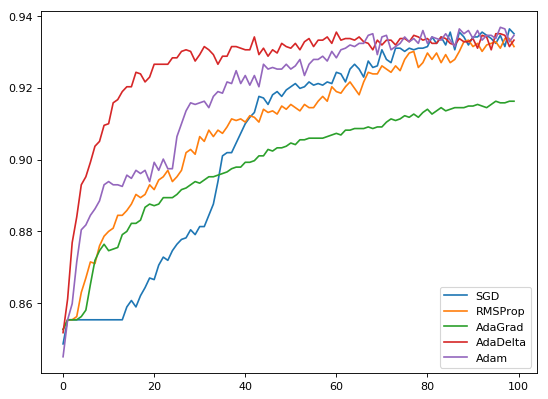

In [78]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history1.epoch, history1.history['acc'], label='SGD')
plt.plot(history2.epoch, history2.history['acc'], label='RMSProp')
plt.plot(history3.epoch, history3.history['acc'], label='AdaGrad')
plt.plot(history4.epoch, history4.history['acc'], label='AdaDelta')
plt.plot(history5.epoch, history5.history['acc'], label='Adam')
plt.legend()
plt.show()